In [2]:
import pandas as pd
import statistics as st
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import wilcoxon


In [3]:
#read the .csv file
base='../../Plots/Subjective_Plots/'
df=pd.read_excel(r'../../Data/Survey_Data/Reminessence_Responses_Organization.xlsx', header=None,index_col=False)

In [4]:
# subject id column = 2
# survey column = 3
Survey=["1. Before sleep + No scent prototype (at the Media Lab)", "2. Morning after sleep + No scent prototype (at home)", "3. Before sleep + Scent prototype (at the Media Lab)", "4. Morning after sleep + Scent prototype (at home)"]

In [5]:
# get contingency table

def get_contingency_table(data_control,data_scent):
    table =[[0]*7,[0]*7]
    for i in range(data_control):
        table[0][data_control[i]-1]+=1
        table[1][data_scent[i]-1]+=1
    return table

## Stress during Recall 2D and 3D (control vs scent)

64 64
0.642956456800007
54 54
0.03137566157033647


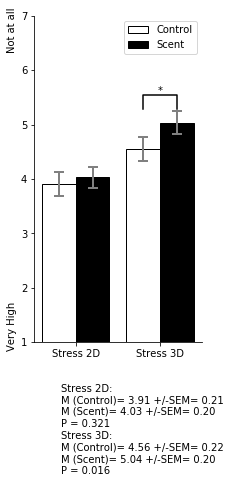

In [8]:
# Calculate and Plot for stress during recall
# Column no. 51 --> 'stress during 3D recall' --> for Lab, Home (scent and control)
# Column no. 96 --> 'stress during 2D recall' --> for Lab, Home (control) for survey =1,2
# Column no. 191 --> 'stress during 2D recall' --> for Lab, Home (scent) for survey =3,4

fig, ax = plt.subplots(1,1, sharex=True,figsize=[3,6])

a =ax
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)
# 2D and 3D Exam
StressControlM=[] #mean control
StressScentM=[] #mean scent
StressControlSem=[] #standard error mean control
StressScentSem=[] #standard error mean scent

Pvalues_of_columns=[]
# stress 2D

xControl=[]
xScent=[]
cols=[51,96,191]

for i in range(1,33):
    if i<=16:
        if(math.isnan(float(df[(df[3]==Survey[0]) & (df[2]==i)][96]))==False) and (math.isnan(float(df[(df[3]==Survey[1]) & (df[2]==i)][96]))==False) and (math.isnan(float(df[(df[3]==Survey[2]) & (df[2]==i)][191]))==False) and (math.isnan(float(df[(df[3]==Survey[3]) & (df[2]==i)][191]))==False):
            xControl.append(int(df[(df[3]==Survey[0]) & (df[2]==i)][96])) #Lab
            xControl.append(int(df[(df[3]==Survey[1]) & (df[2]==i)][96])) #Home
            xScent.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][191])) #Lab
            xScent.append(int(df[(df[3]==Survey[3]) & (df[2]==i)][191])) #Home
    else:
        if(math.isnan(float(df[(df[3]==Survey[2]) & (df[2]==i)][96]))==False) and (math.isnan(float(df[(df[3]==Survey[3]) & (df[2]==i)][96]))==False) and (math.isnan(float(df[(df[3]==Survey[0]) & (df[2]==i)][191]))==False) and (math.isnan(float(df[(df[3]==Survey[1]) & (df[2]==i)][191]))==False):
            xControl.append(int(df[(df[3]==Survey[0]) & (df[2]==i)][191])) #Lab
            xControl.append(int(df[(df[3]==Survey[1]) & (df[2]==i)][191])) #Home
            xScent.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][96])) #Lab
            xScent.append(int(df[(df[3]==Survey[3]) & (df[2]==i)][96])) #Home
            
print(len(xControl),len(xScent))
w, p = wilcoxon(xControl, xScent)
print(p)

# control
StressControl2D=st.mean(xControl)
StressControl2DError=stats.sem(xControl)

StressControlM.append(StressControl2D)
StressControlSem.append(StressControl2DError)

# scent
StressScent2D=st.mean(xScent)
StressScent2DError=stats.sem(xScent)

StressScentM.append(StressScent2D)
StressScentSem.append(StressScent2DError)

# t-test
Statistic,Pval= wilcoxon(xControl,xScent)
Pval=Pval/2
Pvalues_of_columns.append(Pval)

# Plotting significance of 2D
barWidth=0.1
y, h, col = max(StressScentM[0],StressControlM[0]), 0.5, 'k' 
if(Pval<0.0001):
    star="***"
elif Pval<0.001:
    star="**"
elif Pval<0.05:
    star="*"
if Pval<0.05:  
    plt.text(i/2 + barWidth/2 , (y+h), star, ha='center', va='bottom', color=col)
    plt.plot([i/2, i/2, i/2+barWidth, i/2+barWidth], [y+h/2, y+(h), y+(h), y+h/2], lw=1.5, c=col)

# stress 3D
xControl=[]
xScent=[]
for i in range(1,33):
    if(math.isnan(float(df[(df[3]==Survey[0]) & (df[2]==i)][51]))==False) and (math.isnan(float(df[(df[3]==Survey[1]) & (df[2]==i)][51]))==False) and (math.isnan(float(df[(df[3]==Survey[2]) & (df[2]==i)][51]))==False) and (math.isnan(float(df[(df[3]==Survey[3]) & (df[2]==i)][51]))==False):
        xControl.append(int(df[(df[3]==Survey[0]) & (df[2]==i)][51])) #Lab
        xControl.append(int(df[(df[3]==Survey[1]) & (df[2]==i)][51])) #Home
        xScent.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][51])) #Lab
        xScent.append(int(df[(df[3]==Survey[3]) & (df[2]==i)][51])) #Home
   
                
print(len(xControl),len(xScent))
w, p = wilcoxon(xControl, xScent)
print(p)

# control
StressControl3D=st.mean(xControl)
StressControl3DError=stats.sem(xControl)

StressControlM.append(StressControl3D)
StressControlSem.append(StressControl3DError)

# scent
StressScent3D=st.mean(xScent)
StressScent3DError=stats.sem(xScent)

StressScentM.append(StressScent3D)
StressScentSem.append(StressScent3DError)

# t-test
Statistic,Pval= wilcoxon(xControl,xScent)
Pval=Pval/2
Pvalues_of_columns.append(Pval)

# Plotting significance of 3D
i=0.5
y, h, col = max(StressScentM[1],StressControlM[1]), 0.5, 'k' 
if(Pval<0.0001):
    star="***"
elif Pval<0.001:
    star="**"
elif Pval<0.05:
    star="*"
if Pval<0.05:  
    plt.text(i/2 + barWidth/2 , (y+h), star, ha='center', va='bottom', color=col)
    plt.plot([i/2, i/2, i/2+barWidth, i/2+barWidth], [y+h/2, y+(h), y+(h), y+h/2], lw=1.5, c=col)

# Plot Graph


# Set position of bar on X axis
r1 = np.arange(0,int(len(StressControlM))/4,0.25)
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, StressControlM,yerr=StressControlSem, color='#ffffff', width=barWidth, edgecolor='black',capsize=5, label='Control',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(r2, StressScentM,yerr=StressScentSem, color='#000000', width=barWidth, edgecolor='black',capsize=5, label='Scent',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

# Add xticks on the middle of the group bars

plt.xticks([r/4 + barWidth/2 for r in range(len(StressControlM))], ['Stress 2D','Stress 3D'])

txt1="Stress 2D: "+"\nM (Control)= "+str(('%.2f' % StressControlM[0]))+" +/-SEM= "+str(('%.2f' % StressControlSem[0]))+"\nM (Scent)= "+str(('%.2f' % StressScentM[0]))+" +/-SEM= "+str(('%.2f' % StressScentSem[0]))+"\nP = "+str('%.3f' % Pvalues_of_columns[0])
txt2="\nStress 3D: "+"\nM (Control)= "+str(('%.2f' % StressControlM[1]))+" +/-SEM= "+str(('%.2f' % StressControlSem[1]))+"\nM (Scent)= "+str(('%.2f' % StressScentM[1]))+" +/-SEM= "+str(('%.2f' % StressScentSem[1]))+"\nP = "+str('%.3f' % Pvalues_of_columns[1])

plt.ylim([1,7])
txt=txt1+txt2
# fig.text(.1, -0.07, txt1, ha='left')
# fig.text(.55, -0.07, txt2, ha='left')
fig.text(.25, -0.07, txt1, ha='left')
fig.text(.25, -0.18, txt2, ha='left')
fig.text(.0, 0.11, "Very High", ha='left',rotation='vertical')
fig.text(.0, 0.8, "Not at all", ha='left',rotation='vertical')


# Create legend & Show graphic
plt.legend()
plt.savefig(base+'Stress.png', dpi=300,bbox_inches="tight")
plt.show()


## Relaxation and Focus during Memorization 2D and 3D (control vs scent)

32 32
32 32


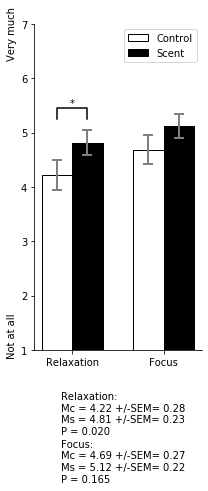

In [10]:
# Column no. 72 -->'Focus during memorization' --> only Lab --> control and scent (survey 1,3)
# Column no. 73 -->'Relaxation during memorization' --> only Lab --> control and scent (survey 1,3)

# Calculate and Plot for Focus during relaxation
fig, ax = plt.subplots(1,1, sharex=True,figsize=[3,6])

a =ax
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)

# 2D and 3D Exam
FocusControlM=[] #mean control
FocusScentM=[] #mean scent
FocusControlSem=[] #standard error mean control
FocusScentSem=[] #standard error mean scent

Pvalues_of_columns=[]

# Relaxation
xControl=[]
xScent=[]
for i in range(1,33):
    if(math.isnan(float(df[(df[3]==Survey[0]) & (df[2]==i)][72]))==False) and (math.isnan(float(df[(df[3]==Survey[2]) & (df[2]==i)][72]))==False):
        xControl.append(int(df[(df[3]==Survey[0]) & (df[2]==i)][72])) #Lab
        xScent.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][72])) #Lab

print(len(xControl),len(xScent))

# control
FocusControl3D=st.mean(xControl)
FocusControl3DError=stats.sem(xControl)

FocusControlM.append(FocusControl3D)
FocusControlSem.append(FocusControl3DError)

# scent
FocusScent3D=st.mean(xScent)
FocusScent3DError=stats.sem(xScent)

FocusScentM.append(FocusScent3D)
FocusScentSem.append(FocusScent3DError)

# t-test
Statistic,Pval= wilcoxon(xControl,xScent)
Pvalues_of_columns.append(Pval)
Pval=Pval/2
# Plotting significance of 3D

y, h, col = max(FocusScentM[0]+FocusScentSem[0],FocusControlM[0]+FocusControlSem[0]), 0.4, 'k' 
i=0
if(Pval<0.0001):
    star="***"
elif Pval<0.001:
    star="**"
elif Pval<0.05:
    star="*"
if Pval<0.05:  
    plt.text(i/2 + barWidth/2 , (y+h), star, ha='center', va='bottom', color=col)
    plt.plot([i/2, i/2, i/2+barWidth, i/2+barWidth], [y+h/2, y+(h), y+(h), y+h/2], lw=1.5, c=col)

# Focus   
xControl=[]
xScent=[]
for i in range(1,33):
    if(math.isnan(float(df[(df[3]==Survey[0]) & (df[2]==i)][73]))==False) and (math.isnan(float(df[(df[3]==Survey[2]) & (df[2]==i)][73]))==False):
        xControl.append(int(df[(df[3]==Survey[0]) & (df[2]==i)][73])) #Lab
        xScent.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][73])) #Lab

        
print(len(xControl),len(xScent))

# control
FocusControl2D=st.mean(xControl)
FocusControl2DError=stats.sem(xControl)

FocusControlM.append(FocusControl2D)
FocusControlSem.append(FocusControl2DError)

# scent
FocusScent2D=st.mean(xScent)
FocusScent2DError=stats.sem(xScent)

FocusScentM.append(FocusScent2D)
FocusScentSem.append(FocusScent2DError)

# t-test
Statistic,Pval= wilcoxon(xControl,xScent)
Pvalues_of_columns.append(Pval)
Pval=Pval/2
# Plotting significance of 2D
barWidth=10
y, h, col = max(FocusScentM[1]+FocusScentSem[1],FocusControlM[1]+FocusControlSem[1]), 0.4, 'k' 
i=6
if(Pval<0.0001):
    star="***"
elif Pval<0.001:
    star="**"
elif Pval<0.05:
    star="*"
if Pval<0.05:  
    plt.text(i/2 + barWidth , (y+h), star, ha='center', va='bottom', color=col)
    plt.plot([i/2, i/2, i/2+barWidth, i/2+barWidth], [y+h/2, y+(h), y+(h), y+h/2], lw=1.5, c=col)


# Plot Graph

# Set position of bar on X axis
r1 = np.arange(0,len(FocusControlM)*30,30)
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, FocusControlM,yerr=FocusControlSem, color='#ffffff', width=barWidth, edgecolor='black',capsize=5, label='Control',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(r2, FocusScentM,yerr=FocusScentSem, color='#000000', width=barWidth, edgecolor='black',capsize=5, label='Scent',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

# Add xticks on the middle of the group bars
# plt.xlabel('Focus/Relaxation', fontweight='bold')
# plt.ylabel('Likert Scale', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(0,len(FocusControlM)*30,30)], ['Relaxation','Focus'])

txt1="Relaxation: "+"\nMc = "+str(('%.2f' % FocusControlM[0]))+" +/-SEM= "+str(('%.2f' % FocusControlSem[0]))+"\nMs = "+str(('%.2f' % FocusScentM[0]))+" +/-SEM= "+str(('%.2f' % FocusScentSem[0]))+"\nP = "+str('%.3f' % Pvalues_of_columns[0])

txt2="\nFocus: "+"\nMc = "+str(('%.2f' % FocusControlM[1]))+" +/-SEM= "+str(('%.2f' % FocusControlSem[1]))+"\nMs = "+str(('%.2f' % FocusScentM[1]))+" +/-SEM= "+str(('%.2f' % FocusScentSem[1]))+"\nP = "+str('%.3f' % Pvalues_of_columns[1])

txt=txt1+txt2
fig.text(.25, -0.07, txt1, ha='left')
fig.text(.25, -0.18, txt2, ha='left')
fig.text(.0, 0.11, "Not at all", ha='left',rotation='vertical')
fig.text(.0, 0.8, "Very much", ha='left',rotation='vertical')

plt.ylim([1,7])
# Create legend & Show graphic
plt.legend()
plt.savefig(base+'Focus_Relaxation.png', dpi=300,bbox_inches="tight")
fig.patch.set_visible(False)

plt.show()

## Relaxation/Focus Qualitative Data for Memorization & Exam

In [ ]:
# Calculate and Plot for stress during recall
import statistics as st
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math

fig, ax = plt.subplots(1,1, sharex=True,figsize=[3,6])

a =ax
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)
# Memorization and Recall Exam

RelaxMemorizationM=[] #mean Memorization
RelaxRecallM=[] #mean Recall
RelaxMemorizationSem=[] #standard error mean Memorization
RelaxRecallSem=[] #standard error mean Recall

Response={'Very Strongly Disagree':1,'Strongly Disagree':2,'Disagree':3,'Neither agree nor disagree':4,'Agree':5,'Strongly Agree':6,'Very Strongly Agree':7, 'nan':'nan'}

# Relaxation

xMemorization=[]
xRecall=[]

for i in range(1,33):
#     print(df[125][i+2],df[126][i+2])
    if(df[(df[3]==Survey[2]) & (df[2]==i)][85].iloc[0] not in Response) :        
        Response[float(df[(df[3]==Survey[2]) & (df[2]==i)][85].iloc[0])]='nan'
    if(df[(df[3]==Survey[2]) & (df[2]==i)][86].iloc[0] not in Response) :        
        Response[float(df[(df[3]==Survey[2]) & (df[2]==i)][86].iloc[0])]='nan'
        
    if(math.isnan(float(Response[df[(df[3]==Survey[2]) & (df[2]==i)][85].iloc[0]]))==False) and (math.isnan(float(Response[df[(df[3]==Survey[2]) & (df[2]==i)][86].iloc[0]]))==False):
        xMemorization.append(int(Response[df[(df[3]==Survey[2]) & (df[2]==i)][85].iloc[0]])) #Lab
        xRecall.append(int(Response[df[(df[3]==Survey[2]) & (df[2]==i)][86].iloc[0]])) #Lab
        
print(len(xMemorization),len(xRecall))
# control
RelaxMemorization2D=st.mean(xMemorization)
RelaxMemorization2DError=stats.sem(xMemorization)

RelaxMemorizationM.append(RelaxMemorization2D)
RelaxMemorizationSem.append(RelaxMemorization2DError)

# Recall
RelaxRecall2D=st.mean(xRecall)
RelaxRecall2DError=stats.sem(xRecall)

RelaxRecallM.append(RelaxRecall2D)
RelaxRecallSem.append(RelaxRecall2DError)



# Subjective Performance

32 32
32 32
32 32
32 32
32 32


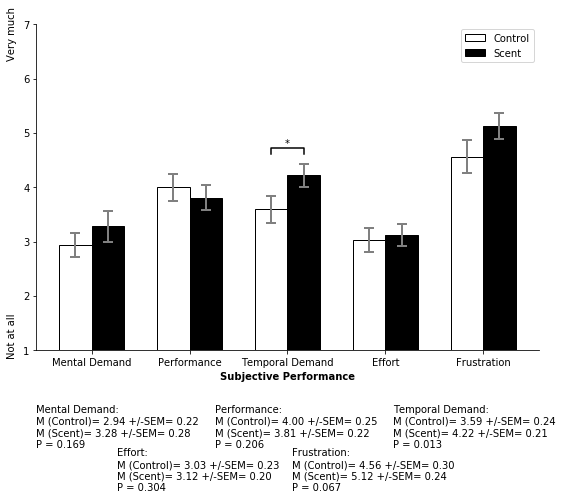

In [7]:
# Column no. 74 -->'Mental Demand' --> only Lab --> control and scent (survey 1,3)
# Column no. 75 -->'Performance' --> only Lab --> control and scent (survey 1,3)
# Column no. 76 -->'Temporal Demand' --> only Lab --> control and scent (survey 1,3)
# Column no. 77 -->'Effort' --> only Lab --> control and scent (survey 1,3)
# Column no. 78 -->'Frustration' --> only Lab --> control and scent (survey 1,3)


# Calculate and Plot for subjective performance
fig, ax = plt.subplots(1,1, sharex=True,figsize=[9,6])

a =ax
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)
# 2D and 3D Exam
PerformanceControlM=[] #mean control
PerformanceScentM=[] #mean scent
PerformanceControlSem=[] #standard error mean control
PerformanceScentSem=[] #standard error mean scent

Pvalues_of_columns=[]
AllDataC=[]
AllDataS=[]
columns=[74,75,76,77,78]

# Mental Demand
for j in columns:
    xControl=[]
    xScent=[]

    for i in range(1,33):
        if(math.isnan(float(df[(df[3]==Survey[0]) & (df[2]==i)][j]))==False) and (math.isnan(float(df[(df[3]==Survey[2]) & (df[2]==i)][j]))==False):
            xControl.append(int(df[(df[3]==Survey[0]) & (df[2]==i)][j])) #Lab
            xScent.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][j])) #Lab
            AllDataC.append(int(df[(df[3]==Survey[0]) & (df[2]==i)][j]))
            AllDataS.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][j]))
            
    
    print(len(xControl),len(xScent))
    # control
    PerformanceControlMental=st.mean(xControl)
    PerformanceControlMentalError=stats.sem(xControl)

    PerformanceControlM.append(PerformanceControlMental)
    PerformanceControlSem.append(PerformanceControlMentalError)

    # scent
    PerformanceScentMental=st.mean(xScent)
    PerformanceScentMentalError=stats.sem(xScent)

    PerformanceScentM.append(PerformanceScentMental)
    PerformanceScentSem.append(PerformanceScentMentalError)

    # t-test
    Statistic,Pval= wilcoxon(xControl,xScent)
    Pval=Pval/2
    Pvalues_of_columns.append(Pval)
    
    # Plotting significance of 2D
    k=columns.index(j)
    barWidth=10
    y, h, col = max(PerformanceControlMental,PerformanceScentMental), 0.5, 'k' 
    if(Pval<0.0001):
        star="***"
    elif Pval<0.001:
        star="**"
    elif Pval<0.05:
        star="*"
    if Pval<0.05:  
        plt.text(k*30 + barWidth/2 , (y+h), star, ha='center', va='bottom', color=col)
        plt.plot([k*30, k*30, k*30+barWidth, k*30+barWidth], [y+h/1.25, y+(h), y+(h), y+h/1.25], lw=1.5, c=col)


# Plot Graph

# Set position of bar on X axis
r1 = np.arange(0,len(PerformanceControlM)*30,30)
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, PerformanceControlM,yerr=PerformanceControlSem, color='#ffffff', width=barWidth, edgecolor='black',capsize=5, label='Control',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(r2, PerformanceScentM,yerr=PerformanceScentSem, color='#000000', width=barWidth, edgecolor='black',capsize=5, label='Scent',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

# Add xticks on the middle of the group bars
plt.xlabel('Subjective Performance', fontweight='bold')
# plt.ylabel('Likert Scale ', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(0,len(PerformanceControlM)*30,30)], ['Mental Demand','Performance','Temporal Demand','Effort','Frustration'])

txt1="Mental Demand: "+"\nM (Control)= "+str(('%.2f' % PerformanceControlM[0]))+" +/-SEM= "+str(('%.2f' % PerformanceControlSem[0]))+"\nM (Scent)= "+str(('%.2f' % PerformanceScentM[0]))+" +/-SEM= "+str(('%.2f' % PerformanceScentSem[0]))+"\nP = "+str('%.3f' % Pvalues_of_columns[0])
txt2="\nPerformance: "+"\nM (Control)= "+str(('%.2f' % PerformanceControlM[1]))+" +/-SEM= "+str(('%.2f' % PerformanceControlSem[1]))+"\nM (Scent)= "+str(('%.2f' % PerformanceScentM[1]))+" +/-SEM= "+str(('%.2f' % PerformanceScentSem[1]))+"\nP = "+str('%.3f' % Pvalues_of_columns[1])
txt3="\nTemporal Demand: "+"\nM (Control)= "+str(('%.2f' % PerformanceControlM[2]))+" +/-SEM= "+str(('%.2f' % PerformanceControlSem[2]))+"\nM (Scent)= "+str(('%.2f' % PerformanceScentM[2]))+" +/-SEM= "+str(('%.2f' % PerformanceScentSem[2]))+"\nP = "+str('%.3f' % Pvalues_of_columns[2])
txt4="\nEffort: "+"\nM (Control)= "+str(('%.2f' % PerformanceControlM[3]))+" +/-SEM= "+str(('%.2f' % PerformanceControlSem[3]))+"\nM (Scent)= "+str(('%.2f' % PerformanceScentM[3]))+" +/-SEM= "+str(('%.2f' % PerformanceScentSem[3]))+"\nP = "+str('%.3f' % Pvalues_of_columns[3])
txt5="\nFrustration: "+"\nM (Control)= "+str(('%.2f' % PerformanceControlM[4]))+" +/-SEM= "+str(('%.2f' % PerformanceControlSem[4]))+"\nM (Scent)= "+str(('%.2f' % PerformanceScentM[4]))+" +/-SEM= "+str(('%.2f' % PerformanceScentSem[4]))+"\nP = "+str('%.3f' % Pvalues_of_columns[4])


txt=txt1+txt2+txt3+txt4+txt5
fig.text(.125, -0.1, txt1, ha='left')
fig.text(.4, -0.1, txt2, ha='left')
fig.text(.675, -0.1, txt3, ha='left')
fig.text(.25, -0.2, txt4, ha='left')
fig.text(.52, -0.2, txt5, ha='left')

fig.text(.08, 0.11, "Not at all", ha='left',rotation='vertical')
fig.text(.08, 0.8, "Very much", ha='left',rotation='vertical')



# Create legend & Show graphic
plt.legend()
plt.ylim([1,7])
plt.savefig(base+'SubjectivePerformance.png', dpi=300,bbox_inches="tight")
plt.show()



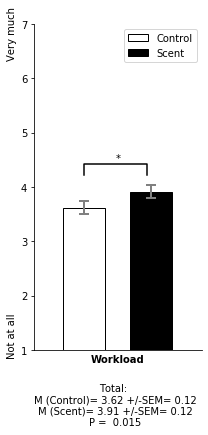

In [13]:
# Column no. 74 -->'Mental Demand' --> only Lab --> control and scent (survey 1,3)
# Column no. 75 -->'Performance' --> only Lab --> control and scent (survey 1,3)
# Column no. 76 -->'Temporal Demand' --> only Lab --> control and scent (survey 1,3)
# Column no. 77 -->'Effort' --> only Lab --> control and scent (survey 1,3)
# Column no. 78 -->'Frustration' --> only Lab --> control and scent (survey 1,3)


# Plot Graph
fig, ax = plt.subplots(1,1, sharex=True, figsize=[3,6])

a =ax
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)
barWidth=0.25

# Make the plot
plt.bar(0.3, st.mean(PerformanceControlM),yerr=stats.sem(AllDataC), color='#ffffff', width=barWidth, edgecolor='black',capsize=5, label='Control',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(0.7, st.mean(PerformanceScentM),yerr=stats.sem(AllDataS), color='#000000', width=barWidth, edgecolor='black',capsize=5, label='Scent',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

# Add xticks on the middle of the group bars
plt.xlabel('Workload', fontweight='bold')
plt.xlim([0,1])
plt.ylim([1,7])

# t-test
Statistic,Pval= wilcoxon(AllDataC,AllDataS)
Pval=Pval/2
Pvalues_of_columns.append(Pval)

# Plotting significance of 2D
i=0.6

y, h, col = max(st.mean(PerformanceControlM)+stats.sem(AllDataC),st.mean(PerformanceScentM)+stats.sem(AllDataS)), 0.4, 'k' 

if(Pval<0.0001):
    star="***"
elif Pval<0.001:
    star="**"
elif Pval<0.05:
    star="*"
if Pval<0.05:  
    plt.text(0.25 + barWidth , (y+h), star, ha='center', va='bottom', color=col)
    plt.plot([i/2, i/2, i/2+3/2*barWidth, i/2+3/2*barWidth], [y+h/2, y+(h), y+(h), y+h/2], lw=1.5, c=col)


txt1="Total: "+"\nM (Control)= "+str(('%.2f' % st.mean(PerformanceControlM)))+" +/-SEM= "+str(('%.2f' % stats.sem(AllDataC)))+"\nM (Scent)= "+str(('%.2f' % st.mean(PerformanceScentM)))+" +/-SEM= "+str(('%.2f' % stats.sem(AllDataS)))+"\nP = "+('% .3f' % (Pval))

fig.text(.5, -0.05, txt1, ha='center')

fig.text(.0, 0.11, "Not at all", ha='left',rotation='vertical')
fig.text(.0, 0.8, "Very much", ha='left',rotation='vertical')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


# Create legend & Show graphic
plt.legend()
plt.savefig(base+'Cummulative_Subjective_Performance.png', dpi=300,bbox_inches="tight")
plt.show()


## Satisfaction and Ease of Use

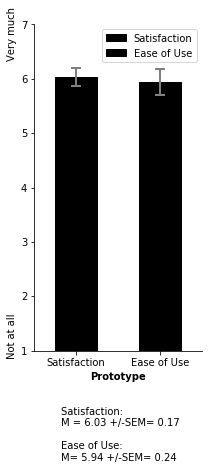

In [14]:
# Column no. 82 -->'Satisfaction of prototype' --> only Lab -->  (survey 3)
# Column no. 81 -->'Ease of use of prototype' --> only Lab --> (survey 3)

# Calculate and Plot for stress during recall
fig, ax = plt.subplots(1,1, sharex=True,figsize=[3,6])

a =ax
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)
# Memorization and Recall Exam

barWidth=0.25
# Relaxation

xSatisfaction=[]
xUsability=[]

for i in range(1,33): 
    if(math.isnan(float(df[(df[3]==Survey[2]) & (df[2]==i)][82]))==False) and (math.isnan(float(df[(df[3]==Survey[2]) & (df[2]==i)][81]))==False):
        xSatisfaction.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][82])) #Lab
        xUsability.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][81])) #Lab        

# Make the plot
plt.bar(0.25, st.mean(xSatisfaction),yerr=stats.sem(xSatisfaction), color='#000000', width=barWidth, edgecolor='black',capsize=5, label='Satisfaction',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(0.75, st.mean(xUsability),yerr=stats.sem(xUsability), color='#000000', width=barWidth, edgecolor='black',capsize=5, label='Ease of Use',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

# Add xticks on the middle of the group bars
plt.xlabel('Prototype', fontweight='bold')
# plt.ylabel('Likert Scale ', fontweight='bold')
plt.xticks([0.25,0.75], ['Satisfaction','Ease of Use'])
plt.xlim([0,1])
plt.ylim([1,7])

txt1="Satisfaction: "+"\nM = "+str(('%.2f' % st.mean(xSatisfaction)))+" +/-SEM= "+str(('%.2f' % stats.sem(xSatisfaction)))
txt2="Ease of Use: "+"\nM= "+str(('%.2f' % st.mean(xUsability)))+" +/-SEM= "+str(('%.2f' % stats.sem(xUsability)))


txt=txt1
fig.text(.25, -0.05, txt1, ha='left')
fig.text(.25, -0.13, txt2, ha='left')
fig.text(.0, 0.11, "Not at all", ha='left',rotation='vertical')
fig.text(.0, 0.8, "Very much", ha='left',rotation='vertical')


# Create legend & Show graphic
plt.legend()
plt.savefig(base+'Prototype_Usability_Satisfaction.png', dpi=300,bbox_inches="tight")
plt.show()



## "I want to use it again"

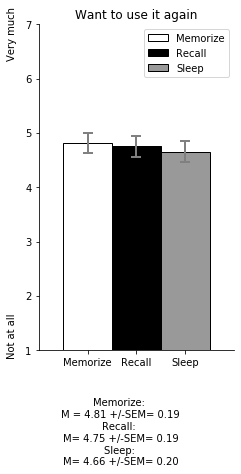

In [15]:
# Column no. 136 -->'Use it again during Memorization' --> only Lab -->  (survey 3)
# Column no. 137 -->'Use it again during Recall' --> only Lab --> (survey 3)
# Column no. 138 -->'Use it again during Sleep' --> only Lab --> (survey 3)
# 210, 211, 217
# Calculate and Plot for stress during recall
fig, ax = plt.subplots(1,1, sharex=True,figsize=[3.5,6])

a =ax
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)

Response={'Very Strongly Disagree':1,'Strongly Disagree':2,'Disagree':3,'Neither agree nor disagree':4,'Agree':5,'Strongly Agree':6,'Very Strongly Agree':7, 'nan':'nan'}
Order={'O1: NO scent prototype on the first day':1,'O2: Scent prototype on the first day':2}

# Memorization and Recall Exam


# Relaxation

xMemorization=[]
xRecall=[]
xSleep=[]

for i in range(1,33):
    if Order[(df[(df[3]==Survey[1]) & (df[2]==i)][104]).iloc[0]]==1:
        
        if(df[(df[3]==Survey[3]) & (df[2]==i)][210].iloc[0] not in Response) :
            Response[float(df[(df[3]==Survey[3]) & (df[2]==i)][210].iloc[0])]='nan'
        if(df[(df[3]==Survey[3]) & (df[2]==i)][211].iloc[0] not in Response) :
            Response[float(df[(df[3]==Survey[3]) & (df[2]==i)][211].iloc[0])]='nan'
        if(df[(df[3]==Survey[3]) & (df[2]==i)][217].iloc[0] not in Response) :
            Response[float(df[(df[3]==Survey[3]) & (df[2]==i)][217].iloc[0])]='nan'
            
        if(math.isnan(float(Response[df[(df[3]==Survey[3]) & (df[2]==i)][210].iloc[0]]))==False) and (math.isnan(float(Response[df[(df[3]==Survey[3]) & (df[2]==i)][211].iloc[0]]))==False) and (math.isnan(float(Response[df[(df[3]==Survey[3]) & (df[2]==i)][217].iloc[0]]))==False):
#             print(Response[df[(df[3]==Survey[3]) & (df[2]==i)][210].iloc[0]])
            xMemorization.append(int(Response[df[(df[3]==Survey[3]) & (df[2]==i)][210].iloc[0]])) #Lab
            xRecall.append(int(Response[df[(df[3]==Survey[3]) & (df[2]==i)][211].iloc[0]]))
            xSleep.append(int(Response[df[(df[3]==Survey[3]) & (df[2]==i)][217].iloc[0]])) #Lab
    else:
        if(math.isnan(float(Response[df[(df[3]==Survey[1]) & (df[2]==i)][210].iloc[0]]))==False) and (math.isnan(float(Response[df[(df[3]==Survey[1]) & (df[2]==i)][211].iloc[0]]))==False) and (math.isnan(float(Response[df[(df[3]==Survey[1]) & (df[2]==i)][217].iloc[0]]))==False):
#             print(Response[df[(df[3]==Survey[1]) & (df[2]==i)][210].iloc[0]])
            xMemorization.append(int(Response[df[(df[3]==Survey[1]) & (df[2]==i)][210].iloc[0]])) #Lab
            xRecall.append(int(Response[df[(df[3]==Survey[1]) & (df[2]==i)][211].iloc[0]]))
            xSleep.append(int(Response[df[(df[3]==Survey[1]) & (df[2]==i)][217].iloc[0]])) #Lab


# Make the plot
plt.bar(0.25, st.mean(xMemorization),yerr=stats.sem(xMemorization), color='#ffffff', width=barWidth, edgecolor='black',capsize=5, label='Memorize',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(0.5, st.mean(xRecall),yerr=stats.sem(xRecall), color='#000000', width=barWidth, edgecolor='black',capsize=5, label='Recall',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(0.75, st.mean(xSleep),yerr=stats.sem(xSleep), color='#999999', width=barWidth, edgecolor='black',capsize=5, label='Sleep',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))


# Add xticks on the middle of the group bars
# plt.xlabel('Activities', fontweight='bold')
# plt.ylabel('Likert Scale ', fontweight='bold')
plt.xticks([0.25,0.5,0.75], ['Memorize','Recall','Sleep'])
plt.title("Want to use it again")
plt.xlim([0,1])
plt.ylim([1,7])

txt1="Memorize: "+"\nM = "+str(('%.2f' % st.mean(xMemorization)))+" +/-SEM= "+str(('%.2f' % stats.sem(xMemorization)))
txt2="Recall: "+"\nM= "+str(('%.2f' % st.mean(xRecall)))+" +/-SEM= "+str(('%.2f' % stats.sem(xRecall)))
txt3="Sleep: "+"\nM= "+str(('%.2f' % st.mean(xSleep)))+" +/-SEM= "+str(('%.2f' % stats.sem(xSleep)))


fig.text(.45, -0.03, txt1, ha='center')
fig.text(.45, -0.085, txt2, ha='center')
fig.text(.45, -0.14, txt3, ha='center')

fig.text(.0, 0.11, "Not at all", ha='left',rotation='vertical')
fig.text(.0, 0.8, "Very much", ha='left',rotation='vertical')


# Create legend & Show graphic
plt.legend()
plt.savefig(base+'UseAgain.png', dpi=300,bbox_inches="tight")
plt.show()




## Subjective Sleep Quality

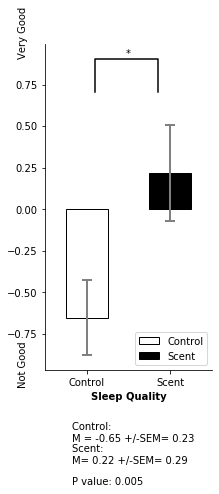

In [37]:
# Column no. 8 -->'Sleep quality in past month' --> only Lab -->  (survey 1,2,3,4)
# Column no. 219 -->'Sleep quality tonight' --> only Lab --> (survey 2,4)

SleepScorePast=[]
SleepScoreTonightControl=[]
SleepScoreTonightScent=[]
barWidth=0.25
fig, ax = plt.subplots(1,1, sharex=True,figsize=[3,6])

a =ax
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)

for i in range(1,33): 
    mean1=[]
    for j in range(4):
        if(math.isnan(float(df[(df[3]==Survey[j]) & (df[2]==i)][8]))==False):
            mean1.append(int(df[(df[3]==Survey[j]) & (df[2]==i)][8]))               
    SleepScorePast.append(st.mean(mean1))
    
    if(math.isnan(float(df[(df[3]==Survey[1]) & (df[2]==i)][219]))==False) and (math.isnan(float(df[(df[3]==Survey[3]) & (df[2]==i)][219]))==False):
        SleepScoreTonightControl.append(int(df[(df[3]==Survey[1]) & (df[2]==i)][219])-st.mean(mean1)) #Lab
        SleepScoreTonightScent.append(int(df[(df[3]==Survey[3]) & (df[2]==i)][219])-st.mean(mean1)) #Lab
    

# Make the plot
# plt.bar(0.20, st.mean(SleepScorePast),yerr=stats.sem(SleepScorePast), color='#A9A9A9', width=barWidth, edgecolor='black',capsize=5, label='Past',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(0.25, st.mean(SleepScoreTonightControl),yerr=stats.sem(SleepScoreTonightControl), color='#ffffff', width=barWidth, edgecolor='black',capsize=5, label='Control',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(0.75, st.mean(SleepScoreTonightScent),yerr=stats.sem(SleepScoreTonightScent), color='#000000', width=barWidth, edgecolor='black',capsize=5, label='Scent',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

# Add xticks on the middle of the group bars
plt.xlabel('Sleep Quality', fontweight='bold')
# plt.ylabel('Likert Scale', fontweight='bold')
plt.xticks([0.25,0.75], ['Control','Scent'])
plt.xlim([0,1])
# plt.ylim([1,7])

txt1="Control: "+"\nM = "+str(('%.2f' % st.mean(SleepScoreTonightControl)))+" +/-SEM= "+str(('%.2f' % stats.sem(SleepScoreTonightControl)))
txt2="Scent: "+"\nM= "+str(('%.2f' % st.mean(SleepScoreTonightScent)))+" +/-SEM= "+str(('%.2f' % stats.sem(SleepScoreTonightScent)))


txt=txt1
fig.text(.25, -0.04, txt1, ha='left')
fig.text(.25, -0.09, txt2, ha='left')

# t-test
Statistic,Pval= wilcoxon(SleepScoreTonightControl,SleepScoreTonightScent)
Pval=Pval/2
Pvalues_of_columns.append(Pval)

# Plotting significance of 2D
i=0.6

y, h, col = max(st.mean(SleepScoreTonightControl)+stats.sem(SleepScoreTonightControl),st.mean(SleepScoreTonightScent)+stats.sem(SleepScoreTonightScent)), 0.4, 'k' 

if(Pval<0.0001):
    star="***"
elif Pval<0.001:
    star="**"
elif Pval<0.05:
    star="*"
if Pval<0.05:  
    plt.text(0.25 + barWidth , (y+h), star, ha='center', va='bottom', color=col)
    plt.plot([i/2, i/2, i/2+3/2*barWidth, i/2+3/2*barWidth], [y+h/2, y+(h), y+(h), y+h/2], lw=1.5, c=col)



txt3="P value: "+'%.3f' % Pval
fig.text(.25, -0.14, txt3, ha='left')
# Create legend & Show graphic
plt.legend()
fig.text(.0, 0.09, "Not Good", ha='left',rotation='vertical')
fig.text(.0, 0.85, "Very Good", ha='left',rotation='vertical')



plt.savefig(base+'SleepQualityDiff.png', dpi=300,bbox_inches="tight")
plt.show()




32 32


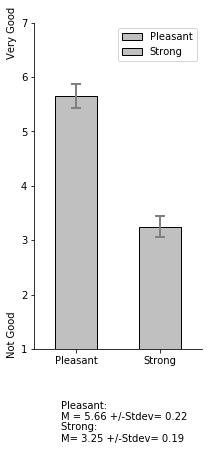

In [18]:
#79 -> Pleasantness (Survey 3)
#80 -> Strength of scent (Survey 3)

Pleasant = []
Strong = []
barWidth=0.25
fig, ax = plt.subplots(1,1, sharex=True,figsize=[3,6])

a =ax
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)
# print(df2[116][0],df2[117][0])
for i in range(1,33):
    if(math.isnan(float(df[(df[3]==Survey[2]) & (df[2]==i)][79]))==False) and (math.isnan(float(df[(df[3]==Survey[2]) & (df[2]==i)][80]))==False):
        Pleasant.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][79].iloc[0])) #Lab
        Strong.append(int(df[(df[3]==Survey[2]) & (df[2]==i)][80].iloc[0])) #Lab
           
print(len(Pleasant),len(Strong)) 
# Make the plot
plt.bar(0.25, st.mean(Pleasant),yerr=stats.sem(Pleasant), color='#C0C0C0', width=barWidth, edgecolor='black',capsize=5, label='Pleasant',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(0.75, st.mean(Strong),yerr=stats.sem(Strong), color='#C0C0C0', width=barWidth, edgecolor='black',capsize=5, label='Strong',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

# Add xticks on the middle of the group bars
# plt.xlabel('Pleasant', fontweight='bold')
# plt.ylabel('Likert Scale', fontweight='bold')
plt.xticks([0.25,0.75], ['Pleasant','Strong'])
plt.xlim([0,1])
plt.ylim([1,7])

txt1="Pleasant: "+"\nM = "+str(('%.2f' % st.mean(Pleasant)))+" +/-Stdev= "+str(('%.2f' % stats.sem(Pleasant)))
txt2="Strong: "+"\nM= "+str(('%.2f' % st.mean(Strong)))+" +/-Stdev= "+str(('%.2f' % stats.sem(Strong)))


txt=txt1
fig.text(.25, -0.04, txt1, ha='left')
fig.text(.25, -0.09, txt2, ha='left')

# Create legend & Show graphic
plt.legend()
fig.text(.0, 0.11, "Not Good", ha='left',rotation='vertical')
fig.text(.0, 0.8, "Very Good", ha='left',rotation='vertical')

plt.savefig(base+'Pleasantness.png', dpi=300,bbox_inches="tight")
plt.show()
